In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)
#!pip install ultralytics==8.0.20
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [57]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.10/dist-packages/torch/_meta_registrations.py", line 8, in <module>
    from torch._decomp import (
  File "/usr/local/lib/python3.10/dist-packages/torch/_decomp/__init__.py", line 190, in <module>
    import torch._decomp.decompositions
  File "/usr/local/lib/python3.10/dist-packages/torch/_decomp/decompositions.py", line 10, in <module>
    import torch._prims as prims
  File "/usr/local/lib/python3.10/dist-packages/torch/_prims/__init__.py", line 1196, in <module>
    as_strided = _make_prim(
  File "/usr/local/lib/python3.10/dist-packages/torch/_p

In [7]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 6.23M/6.23M [00:00<00:00, 140MB/s]


KeyboardInterrupt: 

In [ ]:
results[0].boxes.xyxy

In [ ]:
results[0].boxes.conf

In [ ]:
results[0].boxes.cls

## Custom Training

In [9]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
%cd /content/drive/MyDrive/YOLOv8

/content/drive/MyDrive/YOLOv8


In [12]:
!ls

data  data.yaml  runs  tests.ipynb  Yolov8_object_detection_on_custom_dataset.ipynb  yolov8s.pt


In [ ]:
%cd /content/drive/MyDrive/YOLOv8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=416 plots=True

/content/drive/MyDrive/YOLOv8
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 5, in <module>
    from ultralytics.cfg import entrypoint
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/__init__.py", line 5, in <module>
    from ultralytics.data.explorer.explorer import Explorer
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/__init__.py", line 3, in <module>
    from .base import BaseDataset
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/base.py", line 15, in <module>
    from torch.utils.data import Dataset
  File "/usr/local/lib/python3.10/dist-packages/torch/__init__.py", line 1439, in <module>
    from torch import distributions as distributions
  File "/usr/local/lib/python3.10/dist-packages/torch/distributions/__init__.py", line 80, in <module>
    from .constraint_registry import biject_to, transform_to
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", l

In [ ]:
!ls runs/detect/train/

args.yaml					    results.csv		train_batch572.jpg
confusion_matrix.png				    results.png		val_batch0_labels.jpg
events.out.tfevents.1708766120.b2d32a693fd0.5155.0  train_batch0.jpg	val_batch0_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch1_labels.jpg
P_curve.png					    train_batch2.jpg	val_batch1_pred.jpg
PR_curve.png					    train_batch570.jpg	weights
R_curve.png					    train_batch571.jpg


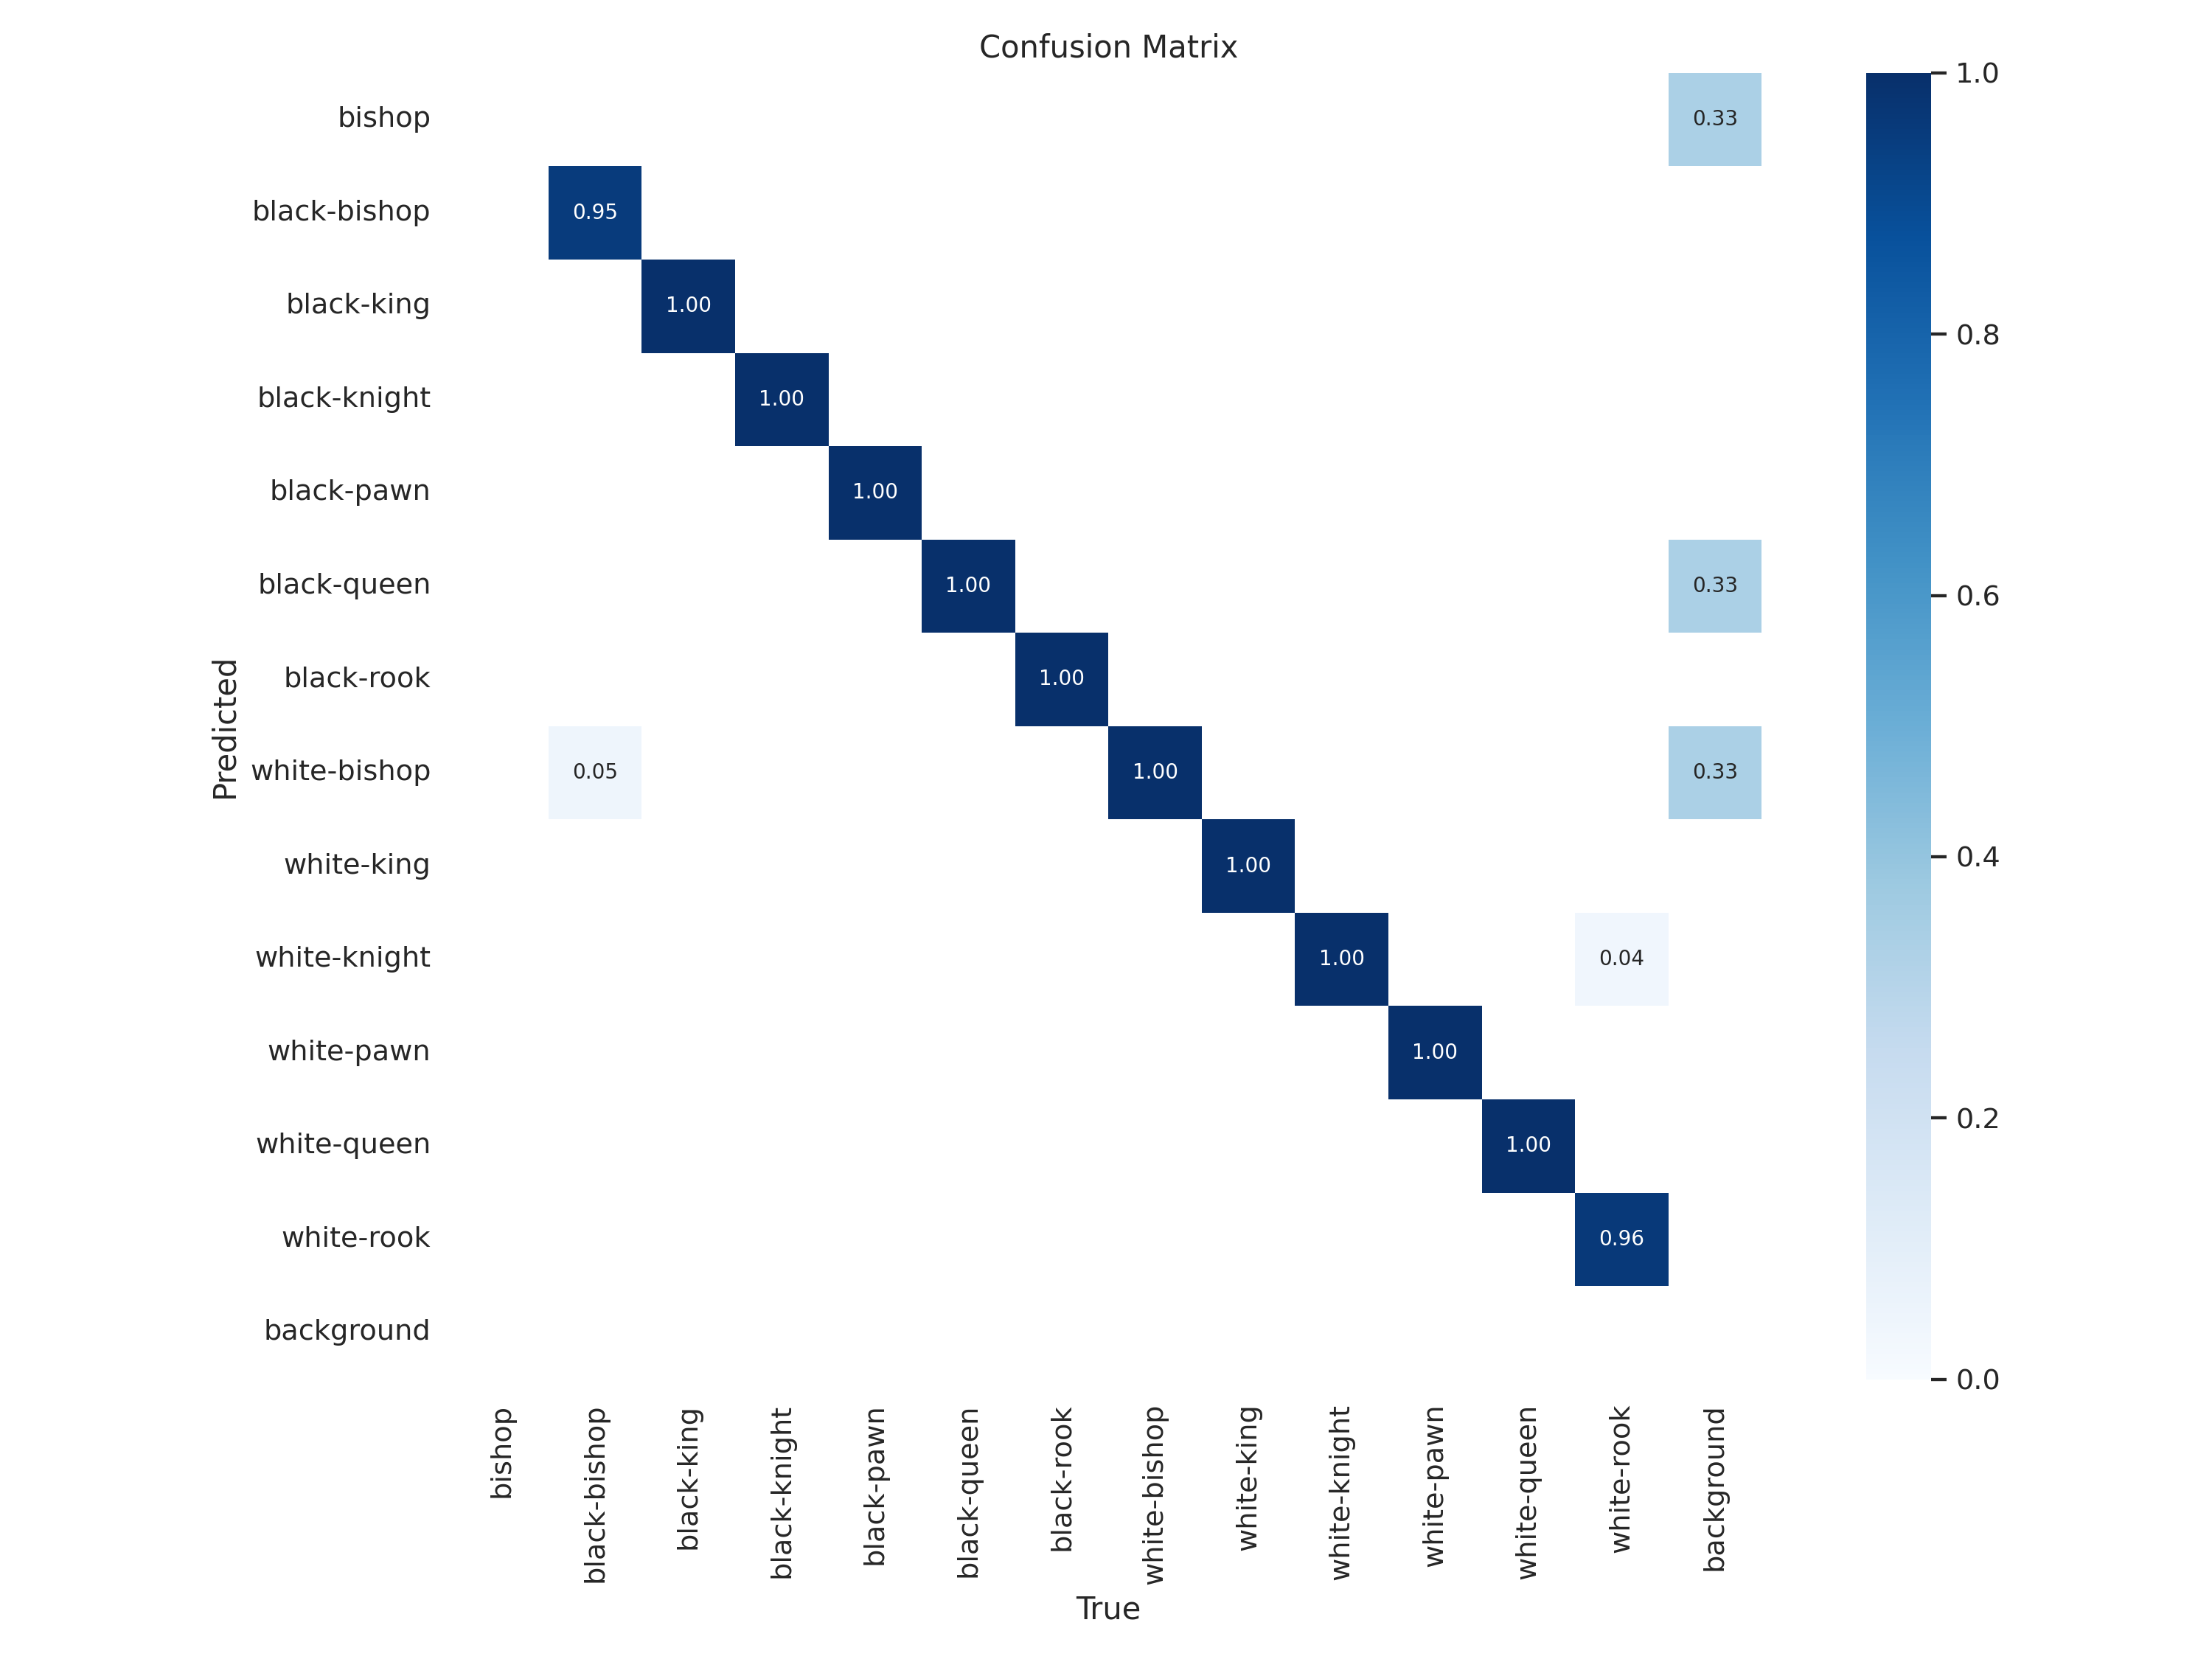

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

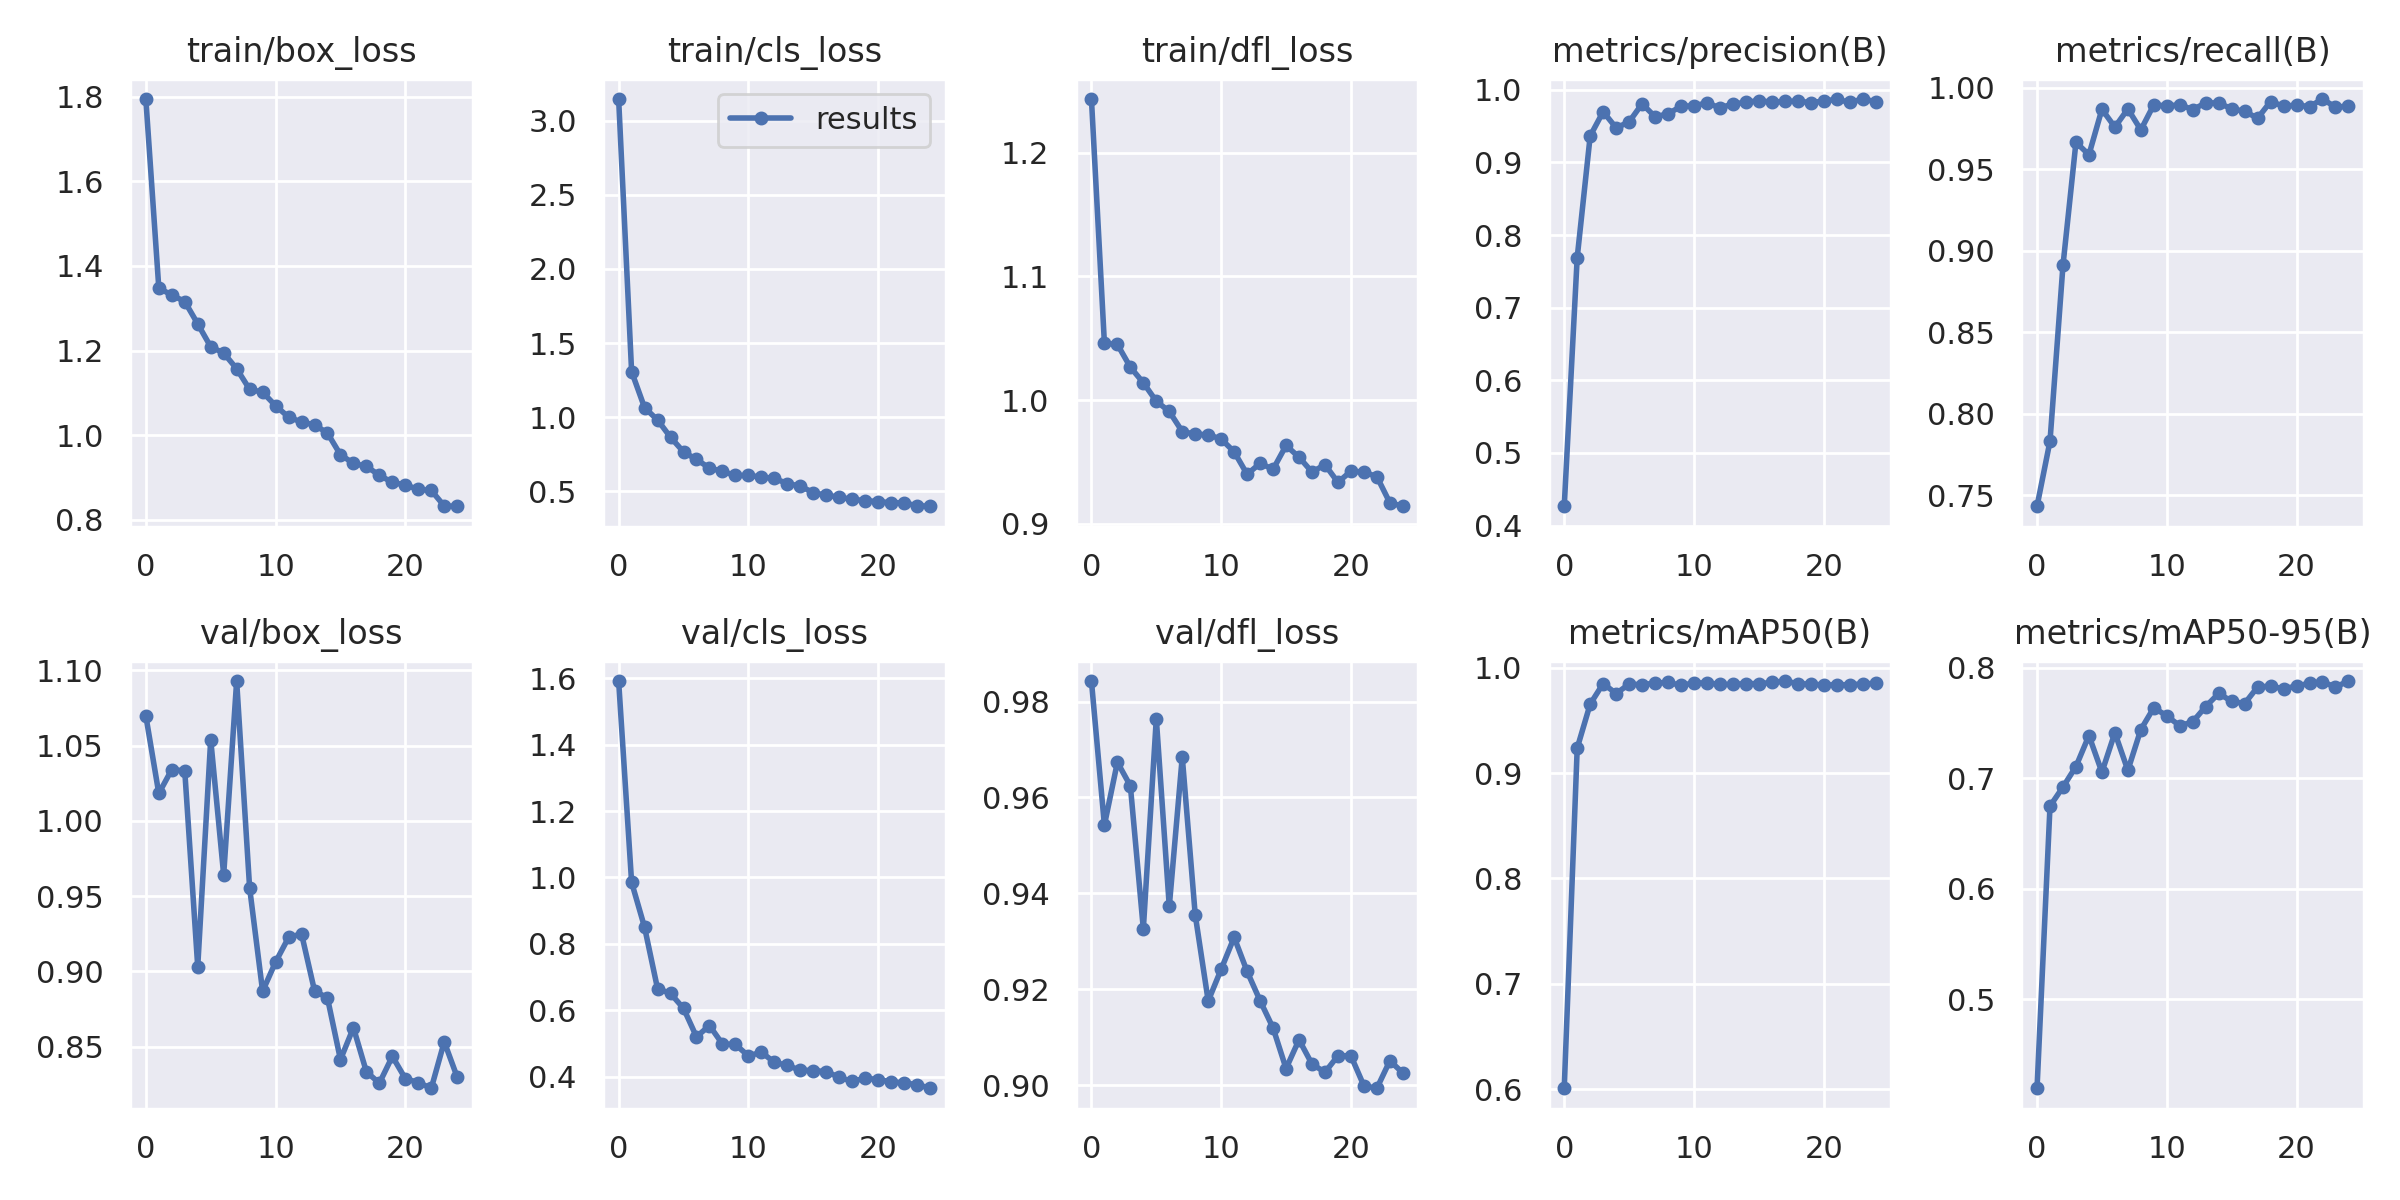

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

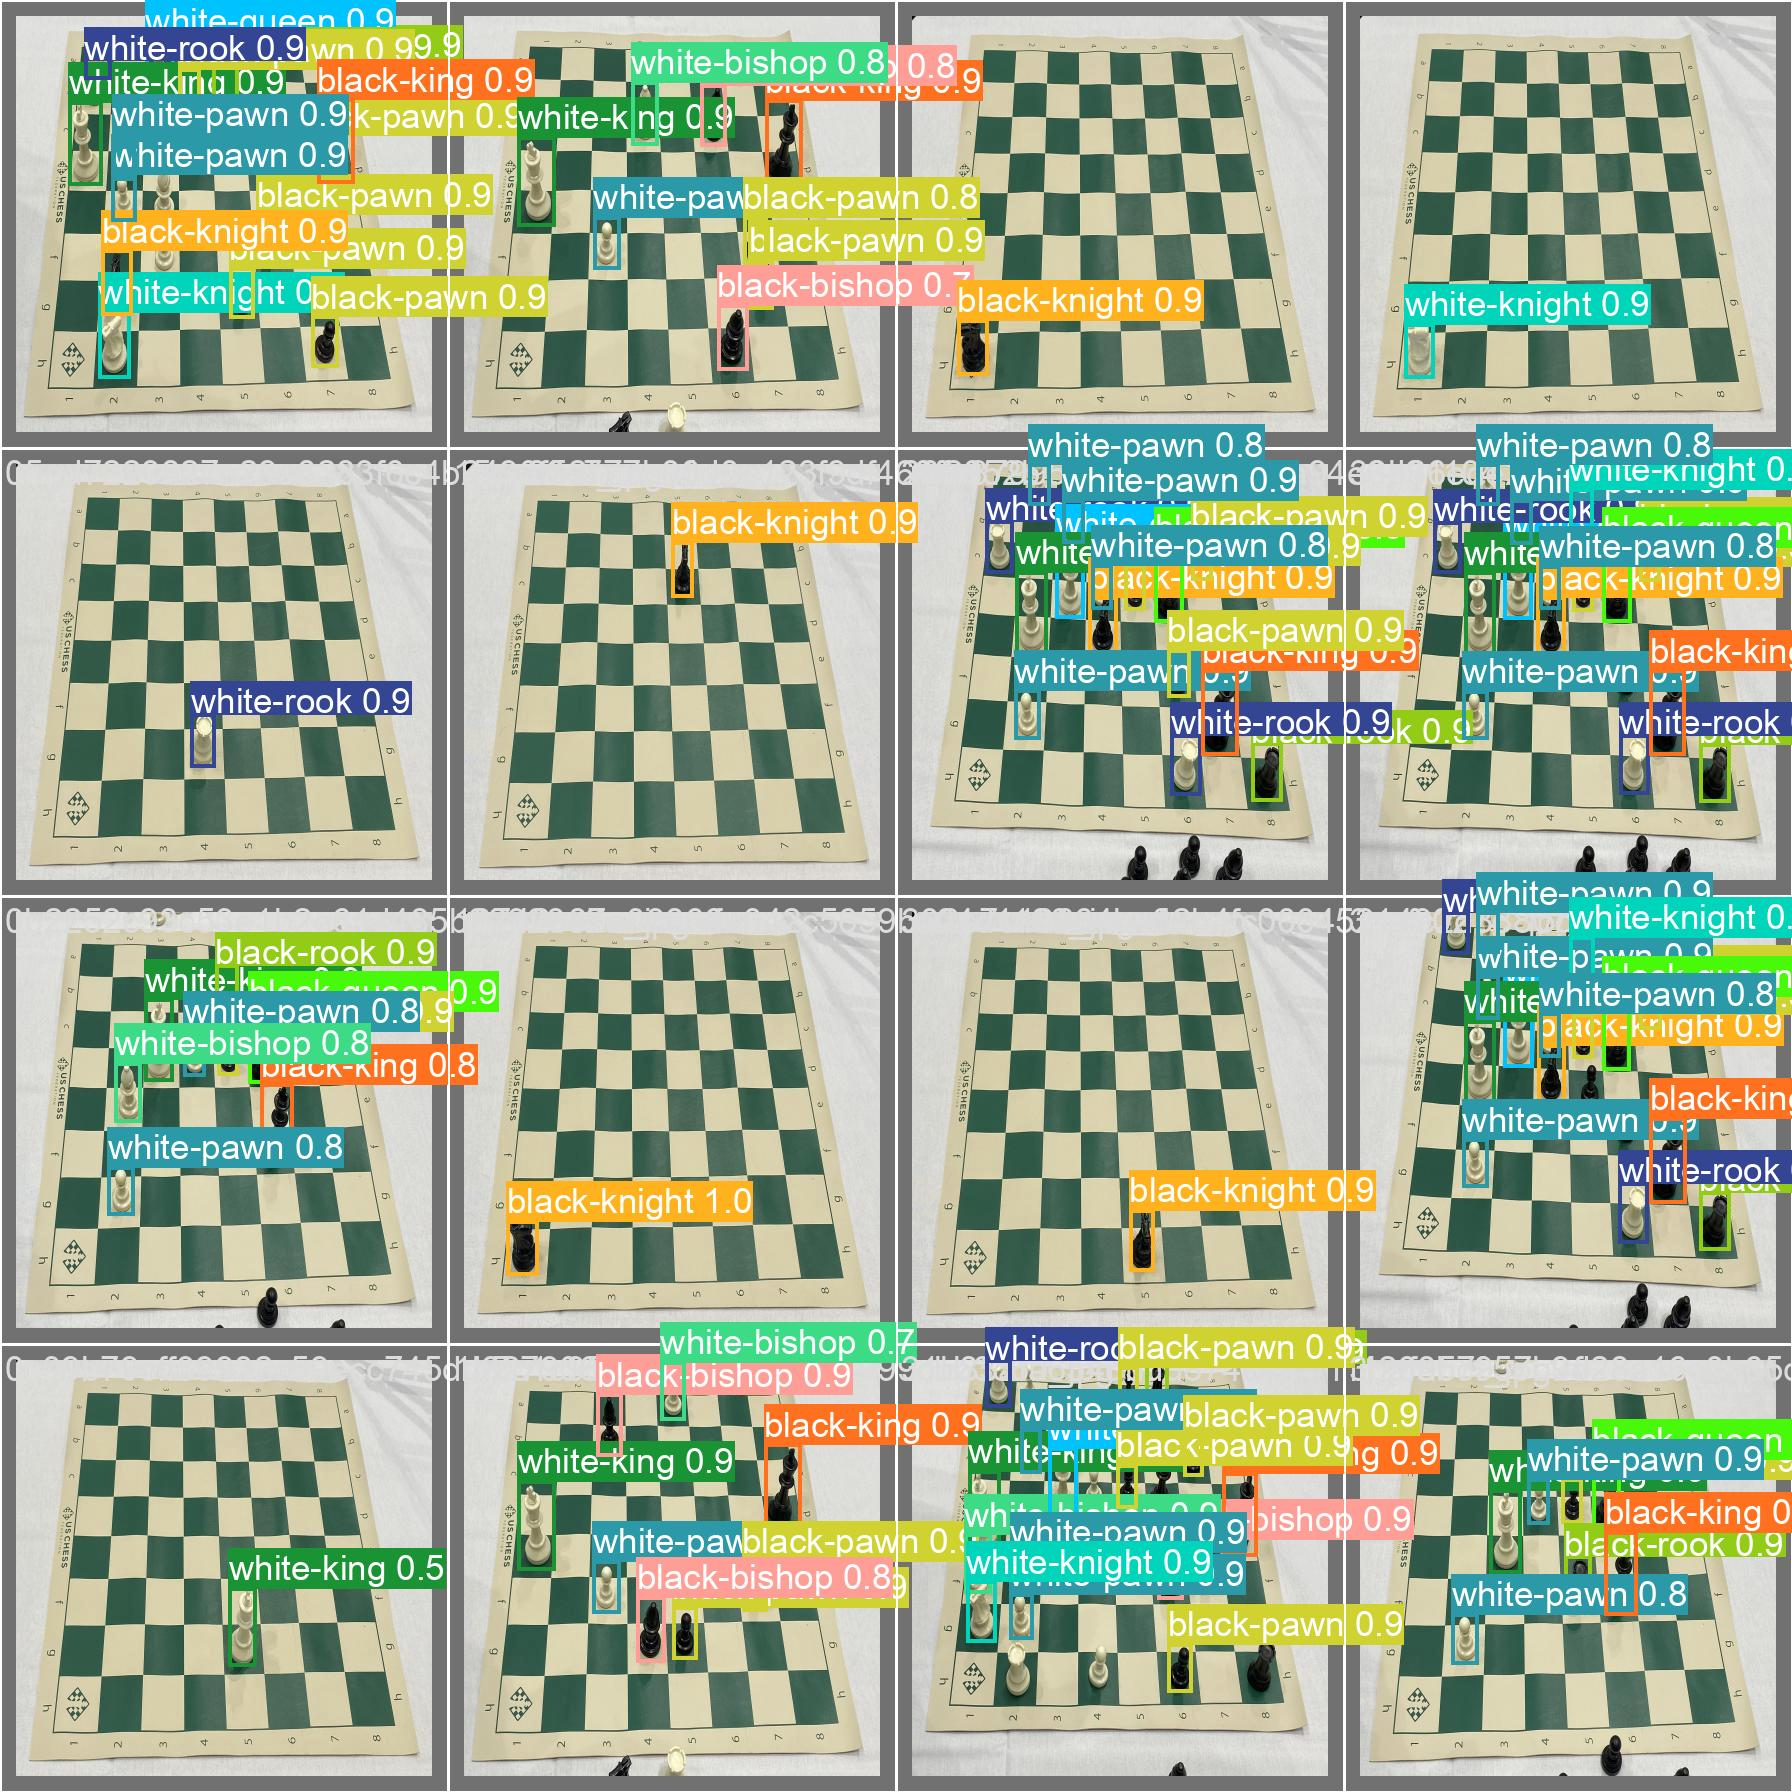

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs
100% 755k/755k [00:00<00:00, 17.2MB/s]
val: Scanning /content/drive/MyDrive/YOLOv8/data/valid/labels... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:32<00:00,  1.81it/s]
val: New cache created: /content/drive/MyDrive/YOLOv8/data/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:28<00:00,  7.06s/it]
                   all         58        386      0.984      0.989      0.985      0.789
          black-bishop         58         22      0.997      0.955      0.959      0.697
            black-king         58         29      0.998          1      0.995      0.843
          black-knight         58         30      0.994          1      0.995       0.79
            black-pawn         58         77      0.997          1      0.995       0.79
           

## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs

image 1/29 /content/drive/MyDrive/YOLOv8/data/test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg: 416x416 1 white-bishop, 315.2ms
image 2/29 /content/drive/MyDrive/YOLOv8/data/test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg: 416x416 1 white-rook, 275.2ms
image 3/29 /content/drive/MyDrive/YOLOv8/data/test/images/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg: 416x416 2 black-bishops, 1 black-king, 2 black-knights, 8 black-pawns, 1 black-queen, 2 black-rooks, 2 white-bishops, 1 white-king, 2 white-knights, 8 white-pawns, 1 white-queen, 2 white-rooks, 271.5ms
image 4/29 /content/drive/MyDrive/YOLOv8/data/test/images/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54da23469189070a075.jpg: 416x416 2 black-bishops, 1

In [33]:
model = YOLO('runs/detect/train/weights/best.pt')

In [41]:
results =model.predict('data/1.jpg')


image 1/1 /content/drive/MyDrive/YOLOv8/data/1.jpg: 416x416 2 black-bishops, 1 black-king, 2 black-knights, 8 black-pawns, 1 black-queen, 2 black-rooks, 2 white-bishops, 1 white-king, 2 white-knights, 8 white-pawns, 1 white-queen, 2 white-rooks, 346.2ms
Speed: 1.8ms preprocess, 346.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


In [40]:
for r in results:
    boxes = r.boxes
    for box in boxes:
        b = box.xywh[0]
        c = box.cls
        print(str(b)+" is "+str(c))

tensor([ 65.0420, 258.7136,  27.6089,  54.1163]) is tensor([9.])
tensor([ 72.5596, 151.0319,  28.8167,  80.2919]) is tensor([8.])
tensor([308.5940,  26.7202,  21.5663,  46.7693]) is tensor([6.])
tensor([ 78.3807, 116.2469,  26.7024,  70.0797]) is tensor([11.])
tensor([325.6613, 123.4506,  29.2441,  66.0157]) is tensor([5.])
tensor([110.0479, 212.8558,  21.3765,  42.6174]) is tensor([10.])
tensor([285.3695, 128.0187,  18.5266,  39.6317]) is tensor([4.])
tensor([344.1702, 253.6007,  31.0029,  51.6420]) is tensor([3.])
tensor([328.2723, 153.0492,  32.1731,  76.2091]) is tensor([2.])
tensor([274.6075,  26.6688,  18.2988,  39.7504]) is tensor([4.])
tensor([ 66.6771, 203.2130,  24.3973,  57.8892]) is tensor([7.])
tensor([87.1787, 22.5197, 22.2403, 45.0394]) is tensor([12.])
tensor([334.2417, 207.4389,  24.6745,  53.8058]) is tensor([1.])
tensor([281.4451,  95.1250,  18.0333,  39.3301]) is tensor([4.])
tensor([109.1634, 255.6476,  23.2654,  43.6511]) is tensor([10.])
tensor([82.8074, 53.2346,

In [70]:
start_point = (int(b[0]),int(b[1]))
end_point = (int(b[0])+int(b[2]),int(b[1])+int(b[3]))
thickness = 2
color = (255, 0, 0)

path = r'/data/1.jpg'
image = cv2.imread(path)
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image2 = cv2.rectangle(image2, start_point, end_point, color, thickness)
cv2_imshow(image2)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [29]:
result =!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/1.jpg

In [32]:
print(type(result))

<class 'IPython.utils.text.SList'>


**NOTE:** Let's take a look at few results.

In [62]:
# import glob
# from IPython.display import Image, display
# display(Image(filename=image, width=600))

for image_path in glob.glob('runs/detect/predict4/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")